In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [14]:
SUPER = "G:\\M2\\"
IMAGE_DIR = "original\\2022_04_09\\cbi_q_1\\C001H001S0001\\"
CSV_DIR_LIGHT = "result\\2022_04_09\\pre\\cbi_q_1\\C001H001S0001\\"
CSV_DIR_DARK_TOP = "result\\2022_04_09\\pre_dark\\top\\cbi_q_1\\C001H001S0001\\"
CSV_DIR_DARK_LEFT = "result\\2022_04_09\\pre_dark\\left\\cbi_q_1\\C001H001S0001\\"
CSV_DIR_DARK_RIGHT = "result\\2022_04_09\\pre_dark\\right\\cbi_q_1\\C001H001S0001\\"
OUTPUT_DIR = "result\\2022_04_09\\tracer\\"

### img 1 to 1000 -> そのまま

### img 1001 to 2000 -> 解析したところ青で囲う

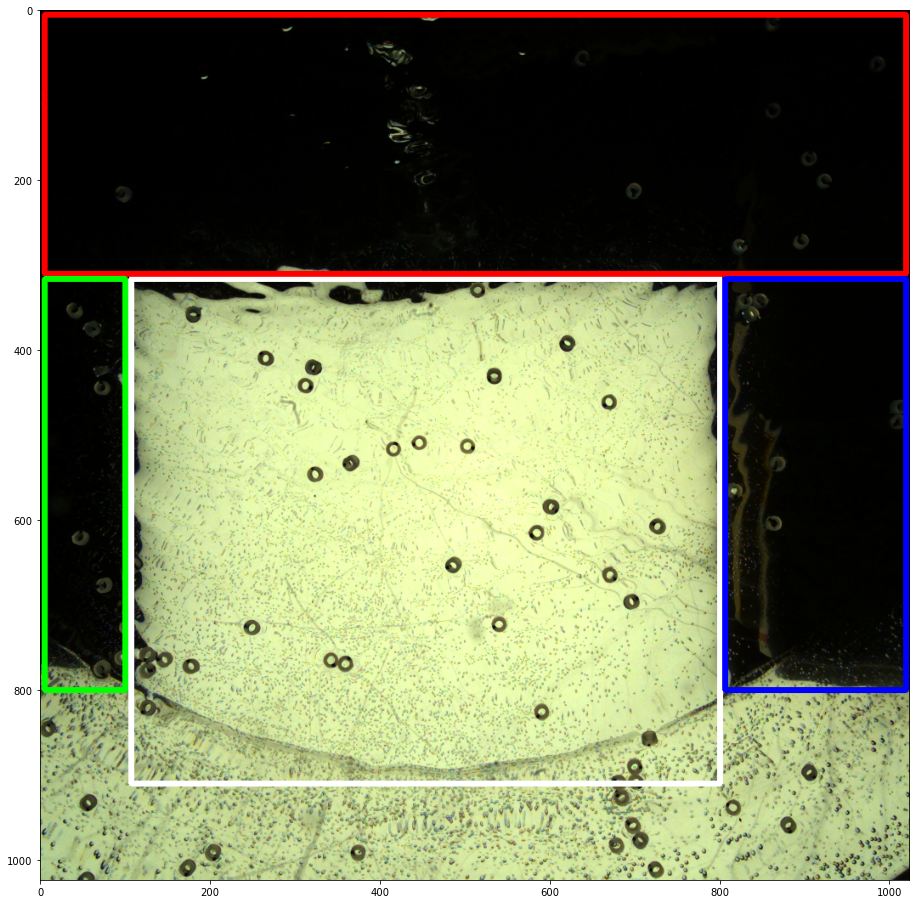

In [15]:
# test
img = cv2.imread(SUPER + IMAGE_DIR + "C001H001S0001003001.bmp")

cv2.rectangle(img, (107, 316), (800, 910), (255, 255, 255), 5)  # center
cv2.rectangle(img, (5, 5), (1019, 310), (0, 0, 255), 5)         # top
cv2.rectangle(img, (5, 316), (100, 800), (0, 255, 0), 5)        # left
cv2.rectangle(img, (806, 316), (1019, 800), (255, 0, 0), 5)     # right

img = img[:, :, [2, 1, 0]]

plt.figure(figsize=(16, 16))
plt.imshow(img)
plt.show()

In [16]:
for i in range(1001, 2001):
    img = cv2.imread(SUPER + IMAGE_DIR + f"C001H001S0001{i:06}.bmp")

    cv2.rectangle(img, (107, 316), (800, 910), (255, 255, 255), 5)  # center
    cv2.rectangle(img, (5, 5), (1019, 310), (0, 0, 255), 5)         # top
    cv2.rectangle(img, (5, 316), (100, 800), (0, 255, 0), 5)        # left
    cv2.rectangle(img, (806, 316), (1019, 800), (255, 0, 0), 5)     # right

    cv2.imwrite(SUPER + OUTPUT_DIR + f"C001H001S0001{i:06}.bmp", img)

### img 2001 to 5000 -> 検出したところを赤で囲う

In [17]:
for i in range(2001, 5001):
    img = cv2.imread(SUPER + IMAGE_DIR + f"C001H001S0001{i:06}.bmp")

    data_light = np.loadtxt(SUPER + CSV_DIR_LIGHT + f"{i:06}.csv", delimiter=',', dtype=int, skiprows=1)
    data_dark_top = np.loadtxt(SUPER + CSV_DIR_DARK_TOP + f"{i:06}.csv", delimiter=',', dtype=int, skiprows=1)
    data_dark_left = np.loadtxt(SUPER + CSV_DIR_DARK_LEFT + f"{i:06}.csv", delimiter=',', dtype=int, skiprows=1)
    data_dark_right = np.loadtxt(SUPER + CSV_DIR_DARK_RIGHT + f"{i:06}.csv", delimiter=',', dtype=int, skiprows=1)

    if data_light.size == 0:
        pass
    elif data_light.ndim == 1:
        cv2.rectangle(img, (data_light[0]+90, data_light[1]+290), (data_light[0]+90+20, data_light[1]+290+20), (255, 0, 255), 2)
    else:
        for a, b in data_light:
            cv2.rectangle(img, (a+90, b+290), (a+90+20, b+290+20), (255, 0, 255), 2)

    if data_dark_top.size == 0:
        pass
    elif data_dark_top.ndim == 1:
        cv2.rectangle(img, (data_dark_top[0]+0, data_dark_top[1]+0), (data_dark_top[0]+0+20, data_dark_top[1]+0+20), (255, 0, 255), 2)
    else:
        for a, b in data_dark_top:
            cv2.rectangle(img, (a+0, b+0), (a+0+20, b+0+20), (255, 0, 255), 2)

    if data_dark_left.size == 0:
        pass
    elif data_dark_left.ndim == 1:
        cv2.rectangle(img, (data_dark_left[0]+0, data_dark_left[1]+290), (data_dark_left[0]+0+20, data_dark_left[1]+290+20), (255, 0, 255), 2)
    else:
        for a, b in data_dark_left:
            cv2.rectangle(img, (a+0, b+290), (a+0+20, b+290+20), (255, 0, 255), 2)

    if data_dark_right.size == 0:
        pass
    elif data_dark_right.ndim == 1:
        cv2.rectangle(img, (data_dark_right[0]+800, data_dark_right[1]+290), (data_dark_right[0]+800+20, data_dark_right[1]+290+20), (255, 0, 255), 2)
    else:
        for a, b in data_dark_right:
            cv2.rectangle(img, (a+800, b+290), (a+800+20, b+290+20), (255, 0, 255), 2)

    cv2.imwrite(SUPER + OUTPUT_DIR + f"C001H001S0001{i:06}.bmp", img)

<ipython-input-17-8448e52c5d5b>:6: UserWarning: loadtxt: Empty input file: "G:\M2\result\2022_04_09\pre_dark\left\cbi_q_1\C001H001S0001\002001.csv"
  data_dark_left = np.loadtxt(SUPER + CSV_DIR_DARK_LEFT + f"{i:06}.csv", delimiter=',', dtype=int, skiprows=1)
<ipython-input-17-8448e52c5d5b>:6: UserWarning: loadtxt: Empty input file: "G:\M2\result\2022_04_09\pre_dark\left\cbi_q_1\C001H001S0001\002002.csv"
  data_dark_left = np.loadtxt(SUPER + CSV_DIR_DARK_LEFT + f"{i:06}.csv", delimiter=',', dtype=int, skiprows=1)
<ipython-input-17-8448e52c5d5b>:6: UserWarning: loadtxt: Empty input file: "G:\M2\result\2022_04_09\pre_dark\left\cbi_q_1\C001H001S0001\002003.csv"
  data_dark_left = np.loadtxt(SUPER + CSV_DIR_DARK_LEFT + f"{i:06}.csv", delimiter=',', dtype=int, skiprows=1)
<ipython-input-17-8448e52c5d5b>:6: UserWarning: loadtxt: Empty input file: "G:\M2\result\2022_04_09\pre_dark\left\cbi_q_1\C001H001S0001\002005.csv"
  data_dark_left = np.loadtxt(SUPER + CSV_DIR_DARK_LEFT + f"{i:06}.csv", de

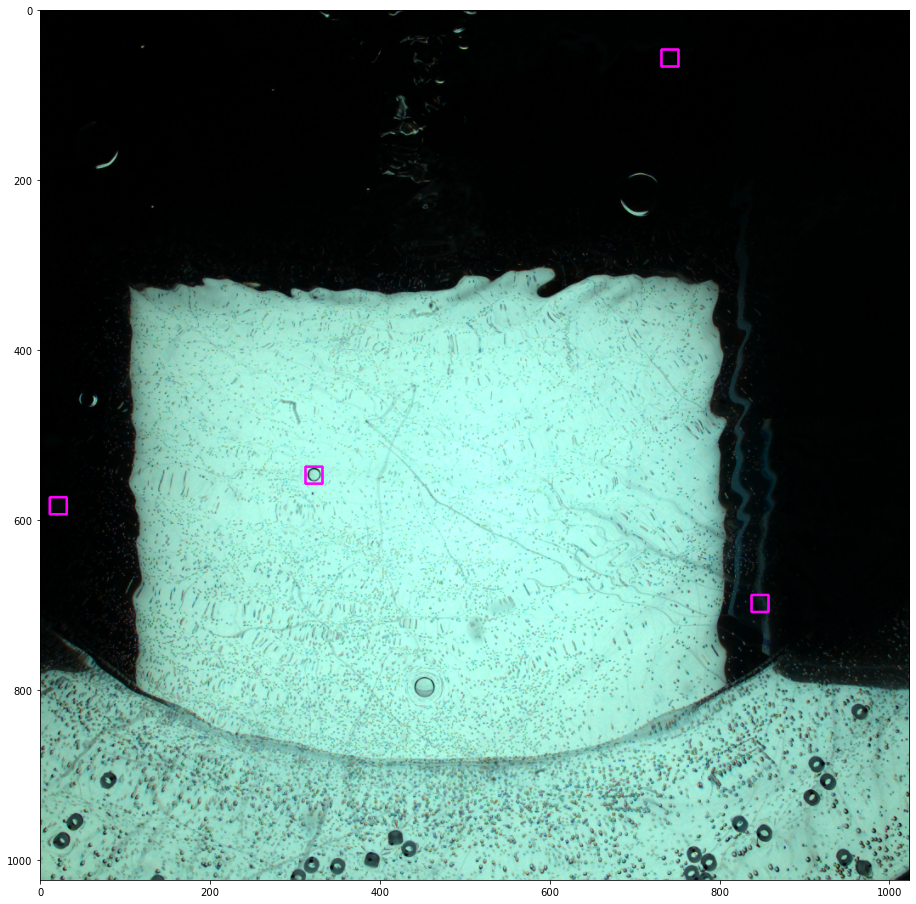

In [18]:
plt.figure(figsize=(16, 16))
plt.imshow(img)
plt.show()